<a href="https://colab.research.google.com/github/dkp3012/assignment/blob/main/assignment7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. Tensorflow Basic

In [10]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
import numpy as np
print("numpy version:", np.__version__)

TensorFlow version: 2.15.0
numpy version: 1.25.2



*   This code imports the TensorFlow library in Python and prints the version of TensorFlow that is currently installed.
*   The import statement brings in the TensorFlow library, which is a popular open-source machine learning framework.
* The print statement then outputs the version of TensorFlow that is installed on the system.
* The tf.__version__ attribute retrieves the version number of the TensorFlow library.


### a) Tensor

In [11]:
# Zero dimensional tensor
zero_dim_tensor = tf.constant(20)
print("Zero-dimensional tensor:",zero_dim_tensor)
print()

# One dimensional tensor
one_dim_tensor = tf.constant([12, 20, 53, 26, 11, 56])
print("One-dimensional tensor:")
print(one_dim_tensor)
print()

# Two dimensional tensor
two_dim_array = np.array([[3, 6, 7, 5],
                          [9, 2, 3, 4],
                          [7, 1, 10, 6],
                          [0, 8, 11, 2]])

two_dim_tensor = tf.constant(two_dim_array)
print("Two-dimensional tensor:",two_dim_tensor)


Zero-dimensional tensor: tf.Tensor(20, shape=(), dtype=int32)

One-dimensional tensor:
tf.Tensor([12 20 53 26 11 56], shape=(6,), dtype=int32)

Two-dimensional tensor: tf.Tensor(
[[ 3  6  7  5]
 [ 9  2  3  4]
 [ 7  1 10  6]
 [ 0  8 11  2]], shape=(4, 4), dtype=int64)


* This code uses the TensorFlow library to create and print tensors of different dimensions.
*  First, a zero-dimensional tensor is created using the tf.constant() function and assigned to the variable zero_dim_tensor.
* The value of this tensor is set to 20.
*   Next, a one-dimensional tensor is created using the same function and assigned to the variable one_dim_tensor.
* The values of this tensor are specified as a list of integers.
*  Finally, a two-dimensional tensor is created using the tf.constant() function and assigned to the variable two_dim_tensor.
* The values of this tensor are specified as a nested list of integers.
*  Each tensor is then printed using the print() function.
* Overall, this code demonstrates how to create tensors of different dimensions using TensorFlow.

In [12]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10 as cf10
import tensorflow as tf
from tensorflow.keras import datasets, layers, models


## 2. Load the dataset
#####a) The built-in dataset is loaded from the keras.datasets() as follows:

In [13]:
(train_images, train_labels), (test_images, test_labels) = cf10.load_data()

* This code uses the Python programming language and is using the load_data() function from the cf10 module to load the CIFAR-10 dataset.
*  The function returns two tuples, one containing the training images and labels, and the other containing the test images and labels.
* The code is using tuple unpacking to assign these values to the variables train_images, train_labels, test_images, and test_labels.
* This code is commonly used in machine learning and computer vision projects to load and preprocess image data for training and testing models.

### 2) Exploratory Data Analysis

In this section, we will focus solely on showing some sample images since we already know the proportion of each class in both the training and testing data.

The helper function `show_images()` shows a total of 12 images by default and takes three main parameters:

1. The training images
2. The class names
3. The training labels


In [14]:
import matplotlib.pyplot as plt

def show_images(train_images, class_names, train_labels, nb_samples=25, nb_row=7):
    plt.figure(figsize=(10, 10))
    for i in range(nb_samples):
        plt.subplot(nb_row, nb_row, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(train_images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[train_labels[i][0]])
    plt.show()



###Now, we can call the function with the required parameters.

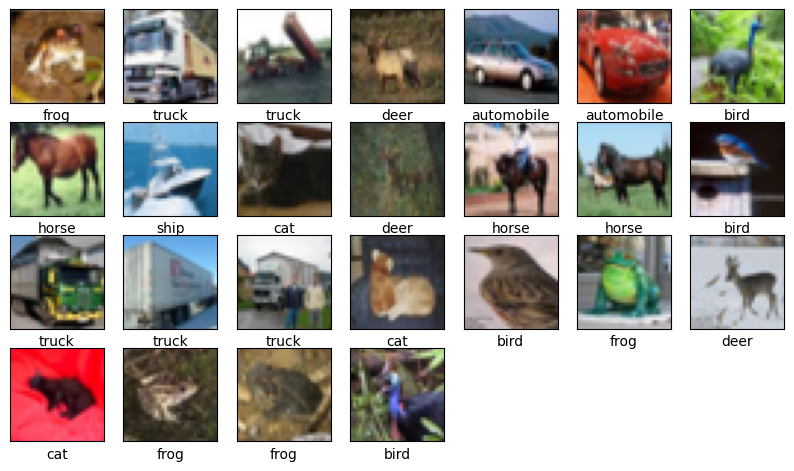

In [15]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
           	'dog', 'frog', 'horse', 'ship', 'truck']

show_images(train_images, class_names, train_labels)

##3. Data preprocessing
Prior to training the model, we need to normalize the pixel values of the data in the same range (e.g. 0 to 1). This is a common preprocessing step when dealing with images to ensure scale invariance, and faster convergence during the training.

In [16]:
# Convert pixel values to float and scale them between 0 and 1
max_pixel_value = 255.0
train_images = train_images.astype('float32') / max_pixel_value
test_images = test_images.astype('float32') / max_pixel_value

#####Also, we notice that the labels are represented in a categorical format like cat, horse, bird, and so one. We need to convert them into a numerical format so that they can be easily processed by the neural network.

In [17]:
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels, len(class_names))
test_labels = to_categorical(test_labels, len(class_names))

##4. Model architecture implementation
The next step is to implement the architecture of the network based on the previous description.

First, we define the model using the Sequential() class, and each layer is added to the model with the add() function

In [ ]:
model = tf.keras.Sequential(
    [
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation="relu",input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),

    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),

    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
]
)

After applying the summary() function to the model, we a comprehensive summary of the model’s architecture with information about each layer, its type, output shape and the total number of trainable parameters.

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

##5. Model training
All the resources are finally available to configure and trigger the training of the model. This is done respectively with the compile() and fit() functions which takes the following parameters:

- The Optimizer is responsible for updating the model’s weights and biases. In our case, we are using the Adam optimizer.
- The loss function is used to measure the misclassification errors, and we are using the Crosentropy().
- Finally, the metrics is used to measure the performance of the model, and accuracy, precision, and recall will be displayed in our use case.

In [ ]:
from tensorflow.keras.metrics import Precision, Recall

BATCH_SIZE = 32
EPOCHS = 30
METRICS = metrics=['accuracy',
               	Precision(name='precision'),
               	Recall(name='recall')]

model.compile(optimizer='adam',
          	loss='categorical_crossentropy',
          	metrics = METRICS)

# Train the model
training_history = model.fit(train_images, train_labels,
                	epochs=EPOCHS, batch_size=BATCH_SIZE,
                	validation_data=(test_images, test_labels))


Epoch 1/30
1563/1563 [==============================] - 72s 45ms/step - loss: 8.0477 - accuracy: 0.1000 - precision: 0.1000 - recall: 0.4960 - val_loss: 8.0591 - val_accuracy: 0.1000 - val_precision: 0.1000 - val_recall: 0.5000
Epoch 2/30
1563/1563 [==============================] - 67s 43ms/step - loss: 8.0590 - accuracy: 0.1000 - precision: 0.1000 - recall: 0.5000 - val_loss: 8.0591 - val_accuracy: 0.1000 - val_precision: 0.1000 - val_recall: 0.5000
Epoch 3/30
1563/1563 [==============================] - 67s 43ms/step - loss: 8.0590 - accuracy: 0.1000 - precision: 0.1000 - recall: 0.5000 - val_loss: 8.0591 - val_accuracy: 0.1000 - val_precision: 0.1000 - val_recall: 0.5000
Epoch 4/30
1563/1563 [==============================] - 69s 44ms/step - loss: 8.0590 - accuracy: 0.1000 - precision: 0.1000 - recall: 0.5000 - val_loss: 8.0591 - val_accuracy: 0.1000 - val_precision: 0.1000 - val_recall: 0.5000
Epoch 5/30
1563/1563 [==============================] - 67s 43ms/step - loss: 8.0590 - a

##6. Model evaluation
After the model training, we can compare its performance on both the training and testing datasets by plotting the above metrics using the show_performance_curve() helper function in two dimensions.

- The horizontal axis (x) is the number of epochs
- The vertical one (y) is the underlying performance of the model.
- The curve represents the value of the metrics at a specific epoch.

For better visualization, a vertical red line is drawn through the intersection of the training and validation performance values along with the optimal value.

In [ ]:
def show_performance_curve(training_result, metric, metric_label):

	train_perf = training_result.history[str(metric)]
	validation_perf = training_result.history['val_'+str(metric)]
	intersection_idx = np.argwhere(np.isclose(train_perf, validation_perf, atol=1e-2)).flatten()
	intersection_value = train_perf[intersection_idx[0]]

	plt.plot(train_perf, label=metric_label)
	plt.plot(validation_perf, label = 'val_'+str(metric))
	plt.axvline(x=intersection_idx, color='r', linestyle='--', label='Intersection')

	plt.annotate(f'Optimal Value: {intersection_value:.4f}',
         	xy=(intersection_idx, intersection_value),
         	xycoords='data',
         	fontsize=10,
         	color='black')

	plt.xlabel('Epoch')
	plt.ylabel(metric_label)
	plt.legend(loc='lower right')

#####Then, the function is applied for both the accuracy and the precision of the model.

In [ ]:
show_performance_curve(training_history, 'accuracy', 'accuracy')

In [ ]:
show_performance_curve(training_history, 'precision', 'precision')

After training the model without any fine-tuning and pre-processing, we end up with:  

-  An accuracy score of 68.73%, meaning that the model correctly classifies 67% of the samples out of every 100 samples.
- And, a precision of 76.99%, meaning that out of each 100 positive predictions, almost 77 of them are true positives, and the remaining 23 are false positives.
- These scores are achieved respectively at the third and second epochs for accuracy and precision.

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

test_predictions = model.predict(test_images)

test_predicted_labels = np.argmax(test_predictions, axis=1)

test_true_labels = np.argmax(test_labels, axis=1)

cm = confusion_matrix(test_true_labels, test_predicted_labels)

cmd = ConfusionMatrixDisplay(confusion_matrix=cm)

cmd.plot(include_values=True, cmap='viridis', ax=None, xticks_rotation='horizontal')
plt.show()